<a href="https://colab.research.google.com/github/PriyamvadaSingh-B/EXPLAINABLE-AI-B-45/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Liver RNA Data (1).csv')

# Display the first 5 rows of the DataFrame
print(df.head())

   ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1    REM1  \
0    11.1818  5.2482  4.1956  11.5047   9.5995   9.6257  11.8053  5.6835   
1    11.0186  5.3847  0.0000  11.6690  11.3980  10.8249  11.5487  3.5408   
2    11.2430  4.0013  0.0000  12.0791   9.8248  10.5608  12.1228  3.5582   
3    11.1612  2.9374  0.0000  12.5931   9.9459  10.5179  12.5044  1.7444   
4    12.0167  4.7857  0.0000  11.4616  10.8368  10.1428  12.9470  3.8613   

    MTVR2  RTN4RL2  ...   NPY5R   GNGT2   GNGT1   TULP3     PTRF   BCL6B  \
0  0.0000   8.7486  ...  0.8379  6.1672  1.7494  8.0444  12.3759  8.0357   
1  1.4714   7.9144  ...  3.5408  5.5302  0.0000  7.5066  10.5302  7.3741   
2  0.0000   7.9795  ...  2.1586  3.1834  0.0000  8.8500   9.5592  8.5064   
3  0.0000  10.3039  ...  0.8347  3.5813  0.4770  8.6376  10.3457  8.3303   
4  0.0000   9.0306  ...  3.5402  3.7620  0.0000  7.9929  11.4056  8.1968   

     GSTK1    SELP     SELS  sample_type_id  
0  13.5037  8.7327  10.4145             

In [ ]:
print("Shape of the DataFrame:", df.shape)

print("\nInformation about the DataFrame (data types and non-null values):\n")
df.info()

print("\nMissing values per column:\n")
print(df.isnull().sum())

Shape of the DataFrame: (422, 20531)

Information about the DataFrame (data types and non-null values):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Columns: 20531 entries, ARHGEF10L to sample_type_id
dtypes: float64(20531)
memory usage: 66.1 MB

Missing values per column:

ARHGEF10L         0
HIF3A             0
RNF17             0
RNF10             0
RNF11             0
                 ..
BCL6B             0
GSTK1             0
SELP              0
SELS              0
sample_type_id    0
Length: 20531, dtype: int64



Generating histograms for the first 10 numerical features:



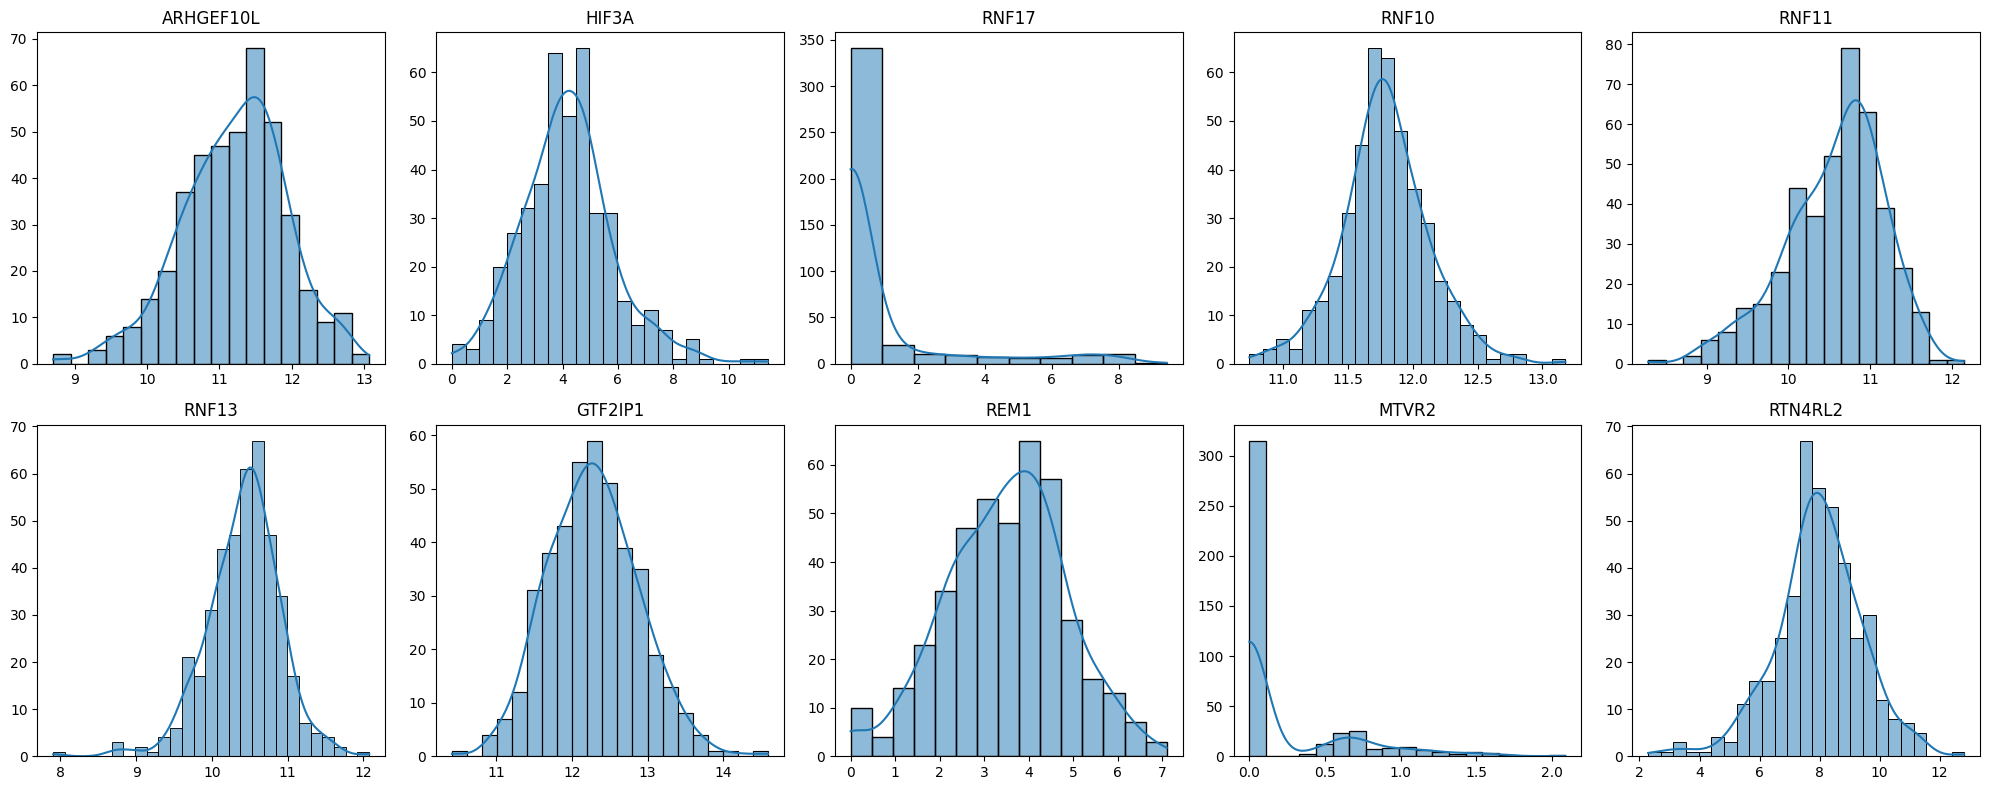


Generating count plot for 'sample_type_id':



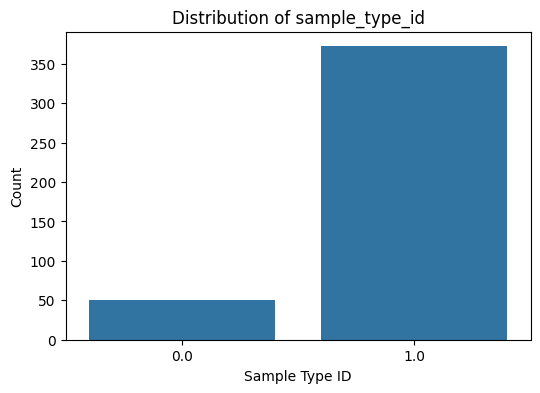

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of features for visualization
# Given the large number of features, we'll pick the first 10 for demonstration.
num_features_to_plot = 10
subset_features = df.drop(columns=['sample_type_id']).columns[:num_features_to_plot]

print(f"\nGenerating histograms for the first {num_features_to_plot} numerical features:\n")

# Plot histograms for the selected numerical features
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(subset_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

print("\nGenerating count plot for 'sample_type_id':\n")

# Plot the distribution of 'sample_type_id'
plt.figure(figsize=(6, 4))
sns.countplot(x='sample_type_id', data=df)
plt.title('Distribution of sample_type_id')
plt.xlabel('Sample Type ID')
plt.ylabel('Count')
plt.show()


Generating box plots for the first 10 numerical features against 'sample_type_id':



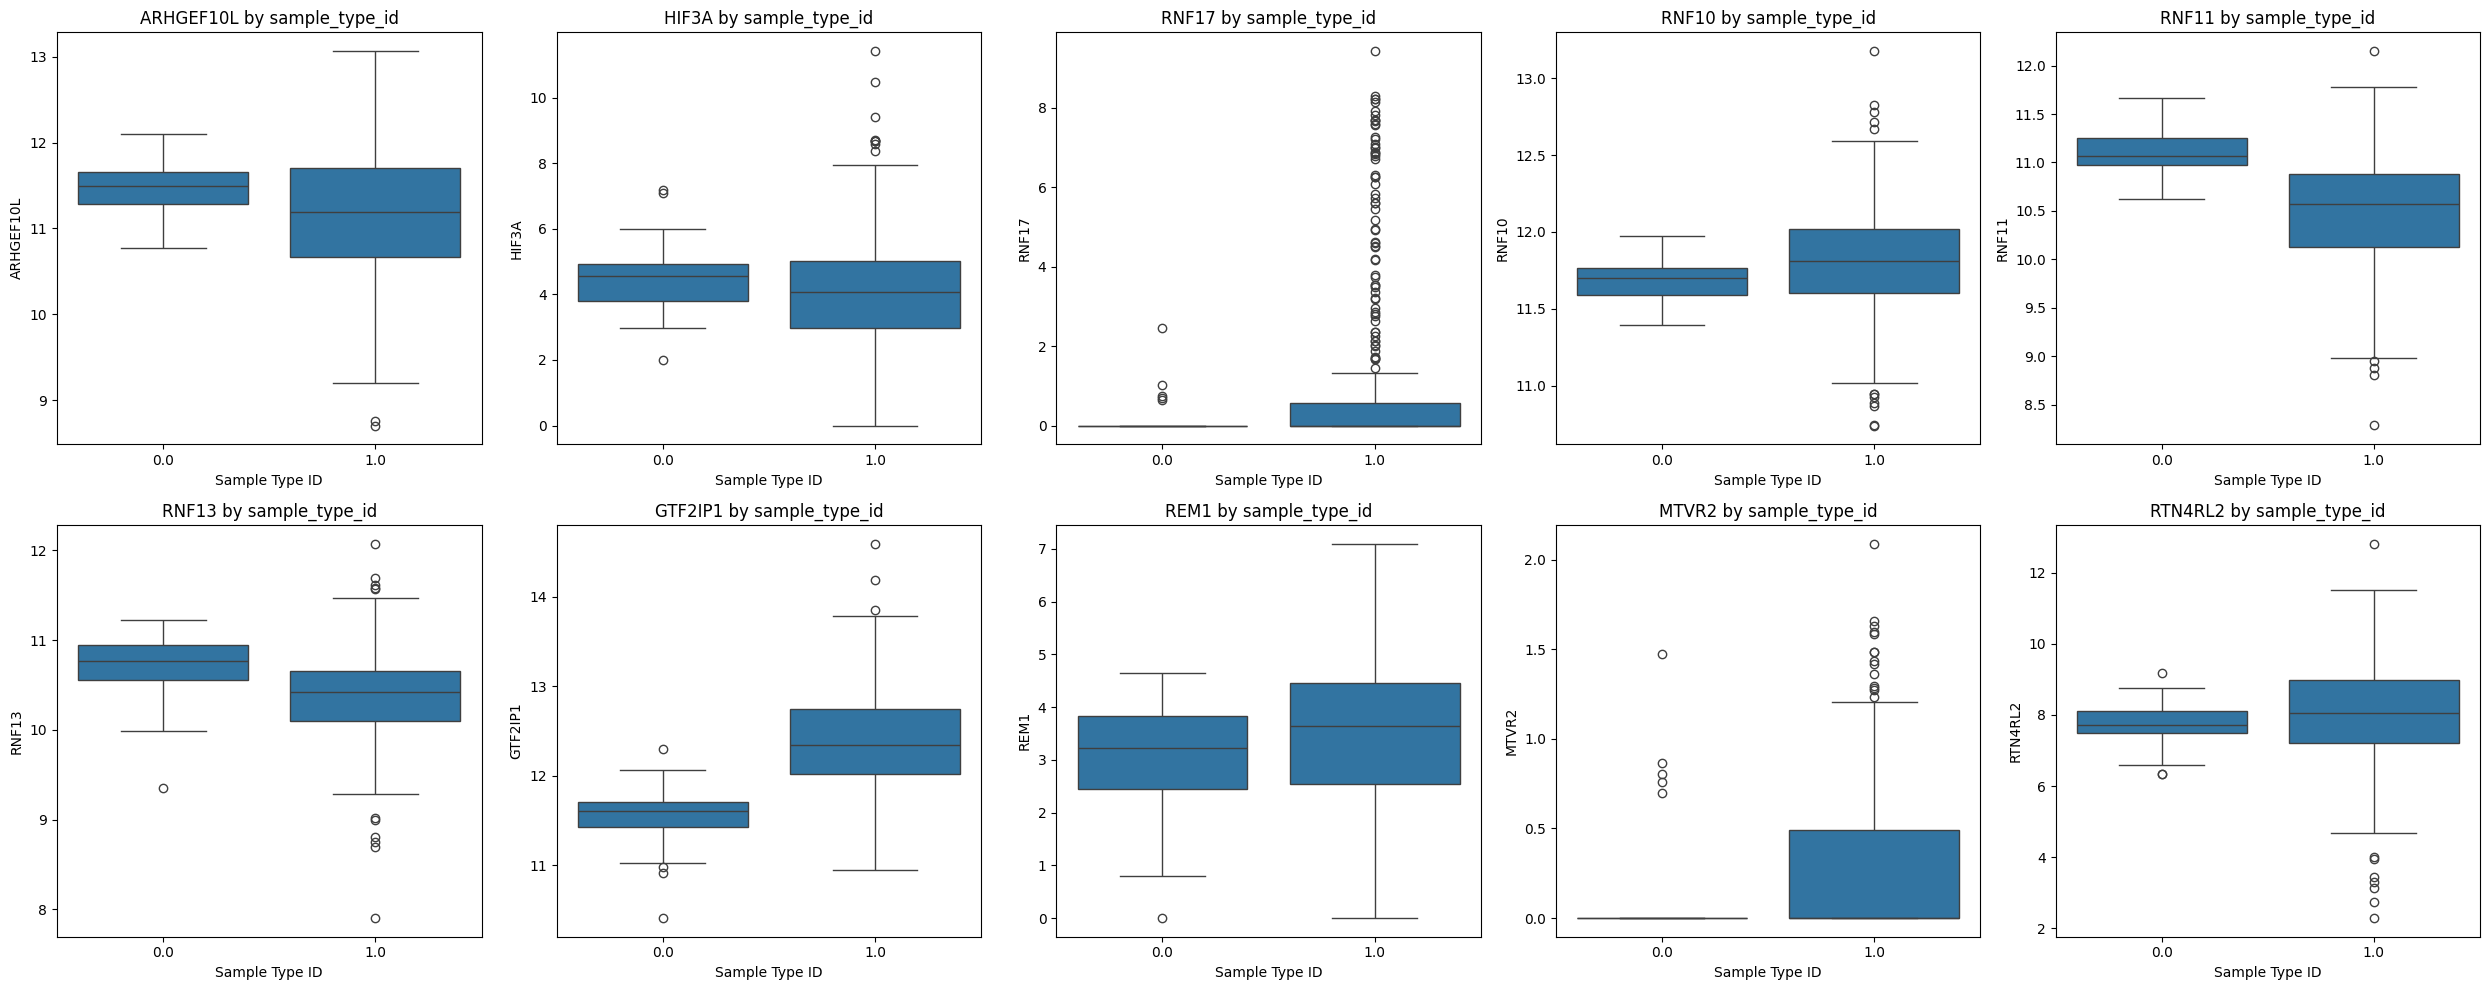

In [ ]:
print(f"\nGenerating box plots for the first {num_features_to_plot} numerical features against 'sample_type_id':\n")

# Plot box plots for the selected numerical features against 'sample_type_id'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(subset_features):
    sns.boxplot(x='sample_type_id', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by sample_type_id')
    axes[i].set_xlabel('Sample Type ID')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Generating correlation heatmap for selected features:



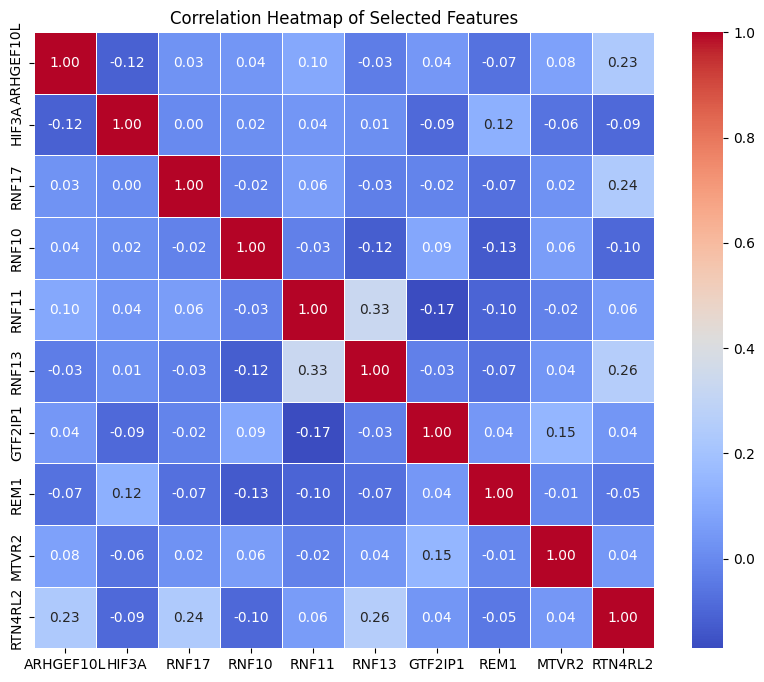

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features (excluding 'sample_type_id')
correlation_matrix = df.drop(columns=['sample_type_id']).corr()

# Select the subset of features for visualization from the correlation matrix
subset_correlation_matrix = correlation_matrix.loc[subset_features, subset_features]

print("\nGenerating correlation heatmap for selected features:\n")

# Visualize the subset correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [ ]:
print("Value counts for 'sample_type_id':\n")
class_counts = df['sample_type_id'].value_counts()
print(class_counts)

print("\nPercentage of each class in 'sample_type_id':\n")
class_percentages = df['sample_type_id'].value_counts(normalize=True) * 100
print(class_percentages)

Value counts for 'sample_type_id':

sample_type_id
1.0    372
0.0     50
Name: count, dtype: int64

Percentage of each class in 'sample_type_id':

sample_type_id
1.0    88.151659
0.0    11.848341
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('sample_type_id', axis=1)
y = df['sample_type_id']

print("Original target variable distribution:")
print(y.value_counts())

# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nResampled target variable distribution:")
print(y_resampled.value_counts())

# Update the DataFrame with resampled data for subsequent steps
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['sample_type_id'] = y_resampled

print("\nShape of the original DataFrame:", df.shape)
print("Shape of the resampled DataFrame:", df_resampled.shape)

Original target variable distribution:
sample_type_id
1.0    372
0.0     50
Name: count, dtype: int64

Resampled target variable distribution:
sample_type_id
1.0    372
0.0    372
Name: count, dtype: int64

Shape of the original DataFrame: (422, 20531)
Shape of the resampled DataFrame: (744, 20531)


/tmp/ipython-input-4166201543.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['sample_type_id'] = y_resampled


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas if not already imported in this cell to ensure pd.DataFrame and pd.Series are available

# Separate features (X) and target (y)
X = df.drop('sample_type_id', axis=1)
y = df['sample_type_id']

print("Original target variable distribution:")
print(y.value_counts())

# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nResampled target variable distribution:")
print(y_resampled.value_counts())

# Reconstruct the DataFrame with resampled data using pd.concat to avoid fragmentation
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='sample_type_id')], axis=1)

print("\nShape of the original DataFrame:", df.shape)
print("Shape of the resampled DataFrame:", df_resampled.shape)

Original target variable distribution:
sample_type_id
1.0    372
0.0     50
Name: count, dtype: int64

Resampled target variable distribution:
sample_type_id
1.0    372
0.0    372
Name: count, dtype: int64

Shape of the original DataFrame: (422, 20531)
Shape of the resampled DataFrame: (744, 20531)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y) from the resampled DataFrame
X_resampled = df_resampled.drop('sample_type_id', axis=1)
y_resampled = df_resampled['sample_type_id']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled features back to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

print("First 5 rows of the scaled features (X_scaled_df):")
print(X_scaled_df.head())

First 5 rows of the scaled features (X_scaled_df):
   ARHGEF10L     HIF3A     RNF17     RNF10     RNF11     RNF13   GTF2IP1  \
0  -0.251488  0.715589  2.340258 -0.883775 -2.211694 -2.205308 -0.309096   
1  -0.531599  0.815895 -0.343254 -0.273862  1.052659  0.610799 -0.747506   
2  -0.146446 -0.200689 -0.343254  1.248507 -1.802765 -0.009393  0.233364   
3  -0.286845 -0.982490 -0.343254  3.156573 -1.582964 -0.110136  0.885342   
4   1.181508  0.375723 -0.343254 -1.043771  0.034057 -0.990991  1.641540   

       REM1     MTVR2   RTN4RL2  ...     TULP2     NPY5R     GNGT2     GNGT1  \
0  2.027432 -0.493613  0.765339  ... -0.700368 -1.086633  1.845705  1.184854   
1  0.175819  3.582600  0.035922  ... -0.700368  0.570192  1.203297 -0.406467   
2  0.190855 -0.493613  0.092845  ... -0.087998 -0.277070 -1.163425 -0.406467   
3 -1.376538 -0.493613  2.125279  ... -0.078745 -1.088594 -0.762147  0.027430   
4  0.452779 -0.493613  1.011917  ... -0.700368  0.569824 -0.579913 -0.406467   

      TULP3

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (595, 20530)
Shape of X_test: (149, 20530)
Shape of y_train: (595,)
Shape of y_test: (149,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create an empty dictionary to store the trained models
models = {}

print("Training Logistic Regression...")
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # Added solver and max_iter for robustness
log_reg.fit(X_train, y_train)
models['Logistic Regression'] = log_reg
print("Logistic Regression trained.")

print("\nTraining Decision Tree...")
# 2. Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
models['Decision Tree'] = dec_tree
print("Decision Tree trained.")

print("\nTraining Random Forest...")
# 3. Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
models['Random Forest'] = rand_forest
print("Random Forest trained.")

print("\nTraining SVM...")
# 4. SVM
# For SVC with probability=True on a dataset with many features, it can be very slow.
# Using a subset of features or a different kernel might be necessary for larger datasets.
# Here, we'll proceed as requested, but be aware of potential long execution times.
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
models['SVM'] = svm_model
print("SVM trained.")

print("\nTraining KNN...")
# 5. KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
models['KNN'] = knn_model
print("KNN trained.")

print("\nTraining Gradient Boosting...")
# 6. Gradient Boosting
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)
models['Gradient Boosting'] = grad_boost
print("Gradient Boosting trained.")

print("\nAll models trained successfully. Models available:")
print(models.keys())

Training Logistic Regression...
Logistic Regression trained.

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training SVM...
SVM trained.

Training KNN...
KNN trained.

Training Gradient Boosting...
Gradient Boosting trained.

All models trained successfully. Models available:
dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting'])


Evaluating models...

Evaluating Logistic Regression...
Logistic Regression evaluation complete.

Evaluating Decision Tree...
Decision Tree evaluation complete.

Evaluating Random Forest...
Random Forest evaluation complete.

Evaluating SVM...
SVM evaluation complete.

Evaluating KNN...
KNN evaluation complete.

Evaluating Gradient Boosting...
Gradient Boosting evaluation complete.

Comparative Model Performance:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  1.000000        1.0  1.000000  1.000000  1.000000
Decision Tree        0.993289        1.0  0.986486  0.993197  0.993243
Random Forest        1.000000        1.0  1.000000  1.000000  1.000000
SVM                  1.000000        1.0  1.000000  1.000000  1.000000
KNN                  0.919463        1.0  0.837838  0.911765  0.972973
Gradient Boosting    0.993289        1.0  0.986486  0.993197  1.000000


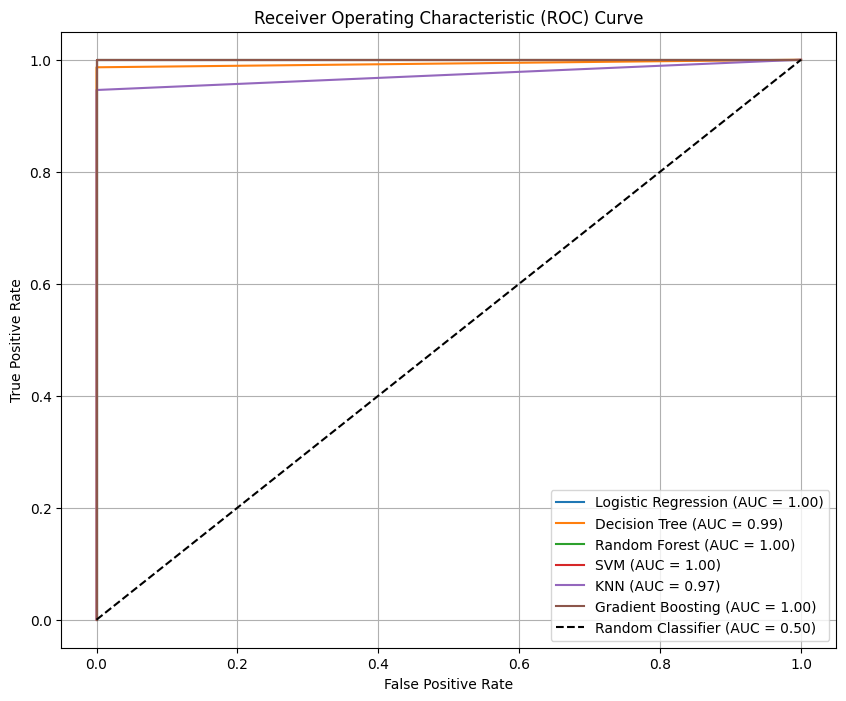

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store results and ROC data
results = {}
roc_data = {}

print("Evaluating models...")
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate predicted probabilities for ROC-AUC
    # SVC's predict_proba might raise an AttributeError if probability=False during initialization.
    # We initialized SVC with probability=True, so this should work.
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Some models (like SVM with default kernel) might not have predict_proba
        # In such cases, if decision_function is available, it can be used, though it's not probabilities
        # For this exercise, we assume predict_proba is available due to SVC(probability=True)
        # If it's not, roc_auc_score might need y_score from decision_function or be skipped.
        print(f"Warning: Model {name} does not have predict_proba. ROC-AUC will be skipped.")
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = None

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    print(f"{name} evaluation complete.")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nComparative Model Performance:")
print(results_df)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    Dropout(0.3),
    Dense(128, activation='relu'), # Hidden layer 1
    Dropout(0.3),
    Dense(64, activation='relu'),  # Hidden layer 2
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print("MLP Model Summary:")
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100, # Number of epochs
    batch_size=32, # Batch size
    validation_split=0.2, # 20% of training data for validation
    verbose=1 # Display training progress
)

print("Deep learning model training complete. Training history stored.")

MLP Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     5,255,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,297,153 (20.21 MB)

 Trainable params: 5,297,153 (20.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8615 - loss: 0.5070 - val_accuracy: 0.9916 - val_loss: 0.1005
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9851 - loss: 0.0944 - val_accuracy: 0.9916 - val_loss: 0.1755
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9800 - loss: 0.1425 - val_accuracy: 0.9916 - val_loss: 0.1673
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9783 - loss: 0.0715 - val_accuracy: 0.9916 - val_loss: 0.1937
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9745 - loss: 0.2405 - val_accuracy: 0.9916 - val_loss: 0.2867
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9856 - loss: 0.2189 - val_accuracy: 0.9916 - val_loss: 0.2788
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9967 - loss: 0.0669 - val_accuracy: 0.9916 - val_loss: 0.2628
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9993 - loss: 0.0120 - val_accuracy: 0.

# Task
Evaluate the deep learning model (`model`) using Accuracy, F1-score, and generate a Confusion Matrix for performance analysis.

## Evaluate Deep Learning Models

### Subtask:
Evaluate the deep learning model(s) using Accuracy, F1-score, and generate a Confusion Matrix for performance analysis.


**Reasoning**:
I will import necessary evaluation metrics from `sklearn.metrics`, use the trained deep learning model to predict probabilities on the test set, convert these probabilities to binary predictions, and then calculate and print the accuracy, F1-score, and confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np # Import numpy for thresholding

print("Evaluating Deep Learning Model...")

# 1. Predict probabilities on the test set
y_pred_proba_dl = model.predict(X_test)

# 2. Convert predicted probabilities to binary class predictions (threshold 0.5)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

# 3. Calculate Accuracy
accuracy_dl = accuracy_score(y_test, y_pred_dl)

# 4. Calculate F1-score
f1_dl = f1_score(y_test, y_pred_dl, zero_division=0)

# 5. Compute Confusion Matrix
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)

# 6. Print the results
print(f"\nDeep Learning Model Accuracy: {accuracy_dl:.4f}")
print(f"Deep Learning Model F1-score: {f1_dl:.4f}")
print("\nDeep Learning Model Confusion Matrix:")
print(conf_matrix_dl)

print("\nDeep learning model evaluation complete.")

Evaluating Deep Learning Model...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Deep Learning Model Accuracy: 1.0000
Deep Learning Model F1-score: 1.0000

Deep Learning Model Confusion Matrix:
[[75  0]
 [ 0 74]]

Deep learning model evaluation complete.


## Perform Explainable AI (XAI)

### Subtask:
Apply Explainable AI techniques such as Feature Importance, SHAP, LIME, and PDP/ICE plots to interpret model decisions for key features. Visualize the results to highlight important features and their impact.


#### Reasoning:
Before proceeding with XAI techniques, it's essential to ensure that the required libraries (`shap` and `lime`) are installed. If they are not already installed, the following command will install them. After installation, I will import all necessary libraries for the subsequent XAI steps.

**Reasoning**:
I will install the `shap` and `lime` libraries using `pip` as they are essential for the upcoming XAI steps. This step ensures all necessary dependencies are met before proceeding.



In [ ]:
import sys

# Install shap and lime if not already installed
!{sys.executable} -m pip install shap lime

print("Shap and Lime libraries installed successfully.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5d76bfe62821b863513fd71ffd4e2d66ec0c30c474068aa526da63109ef839f1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Shap and Lime libraries installed successfully.


**Reasoning**:
Now that the XAI libraries are installed, I will import all necessary libraries for XAI, including `sklearn.inspection` for PDPs, `shap`, and `lime`. Then, I will proceed to calculate and visualize feature importances for the tree-based models (Random Forest and Gradient Boosting) to identify the most influential features. This will be presented using a bar plot.




Calculating and visualizing Feature Importance for tree-based models...
Top 10 features by Random Forest:
       Feature  Importance
19364  SLC26A6    0.026344
6086     AMHR2    0.024937
9959   FAM180A    0.018847
992      PLVAP    0.018813
10882    BMPER    0.018301
17189    PVALB    0.017913
14114    GPM6A    0.017524
6529    CXCL12    0.017397
19431    RCAN1    0.015500
1437     CCL23    0.015304

Top 10 features by Gradient Boosting:
         Feature  Importance
12941    ANGPTL6    0.954025
8344       HOXD4    0.021504
2659     COL15A1    0.007957
11975     CDKN2A    0.004366
5351       EDIL3    0.003651
4080       GABRD    0.001798
11266   C11orf20    0.001246
3569      PARP10    0.001010
16592  HIST1H2AL    0.000820
11660      IFRD2    0.000667


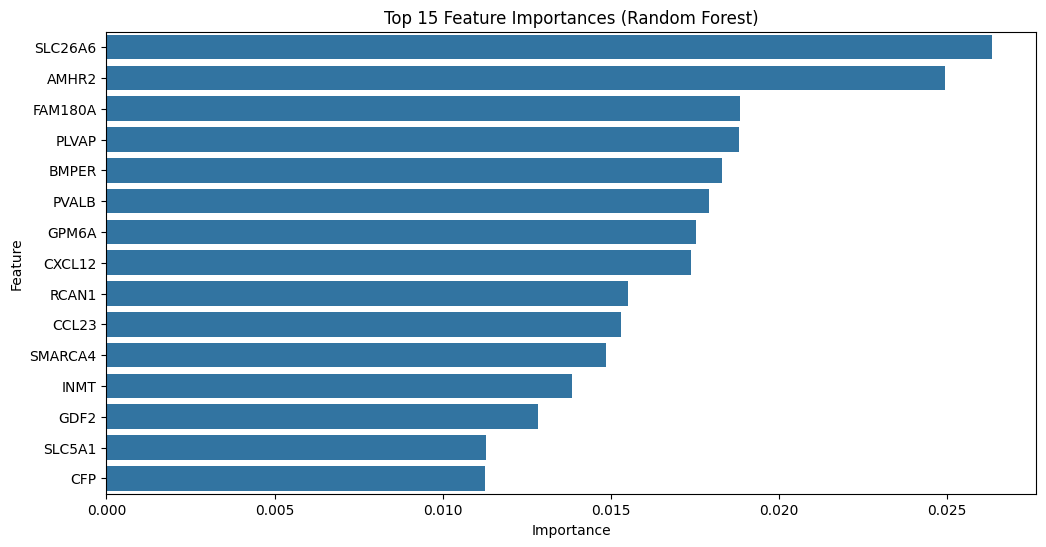

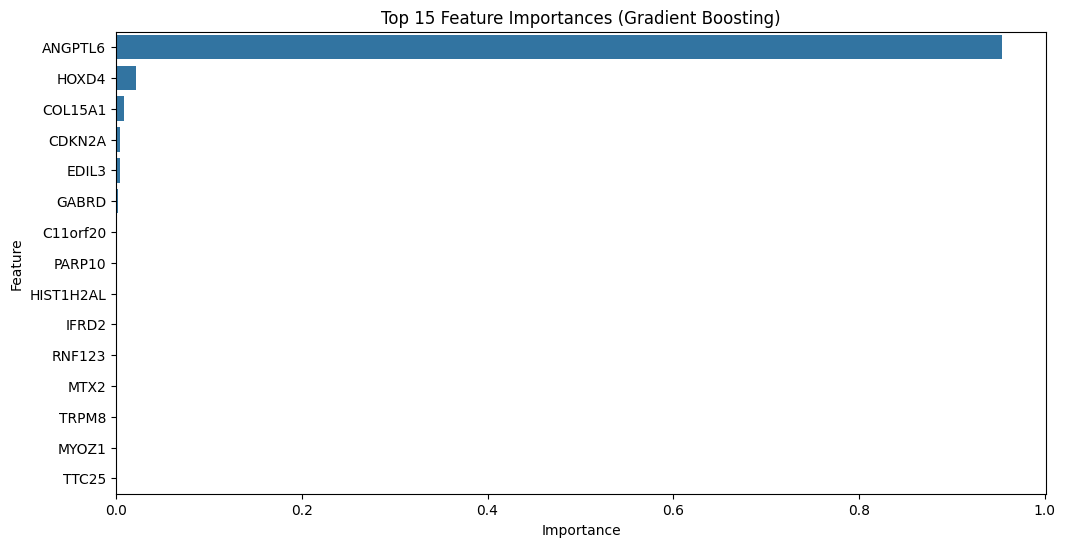

In [ ]:
import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay

# --- 1. Feature Importance for tree-based models ---

print("\nCalculating and visualizing Feature Importance for tree-based models...")

# Get feature importances from Random Forest
rf_feature_importances = models['Random Forest'].feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Get feature importances from Gradient Boosting
gb_feature_importances = models['Gradient Boosting'].feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 features by Random Forest:")
print(rf_importance_df.head(10))

print("\nTop 10 features by Gradient Boosting:")
print(gb_importance_df.head(10))

# Visualize top N feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize top N feature importances for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df.head(15))
plt.title('Top 15 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Reasoning**:
I will apply SHAP to interpret the predictions of the Random Forest model. This involves creating a SHAP `TreeExplainer`, calculating SHAP values for a subset of the test data (to manage computational load given the high dimensionality), and then visualizing the global feature importance using a SHAP summary plot to understand which features contribute most to the model's predictions.



In [ ]:
print("\nApplying SHAP for Random Forest model...")

# Choose Random Forest as the model for SHAP explanation
rf_model = models['Random Forest']

# Create a SHAP explainer object for tree-based models
explainer = shap.TreeExplainer(rf_model)

# For performance, we'll calculate SHAP values for a subset of the test set
# or for the entire test set if computational resources allow.
# Given the high dimensionality, let's use a sample of the test set for background data if needed for KernelExplainer/DeepExplainer,
# but for TreeExplainer, it directly uses the model and feature values.

# Calculate SHAP values for the test set
# It might be computationally intensive for all features and all test samples.
# Let's take a sample of X_test for SHAP values calculation if it's too slow otherwise.
# For now, let's try with a small subset of X_test (e.g., 50 samples) to generate the summary plot quickly.
# If it's still too slow, we can reduce the number of features further.

sample_size = 50 # Number of samples to explain
X_test_sample = X_test.sample(n=min(sample_size, len(X_test)), random_state=42)

# Calculate SHAP values for the sampled test set
shap_values = explainer.shap_values(X_test_sample)

# Visualize global feature importance using a SHAP summary plot
print("\nGenerating SHAP Summary Plot for Random Forest...")
shap.summary_plot(shap_values[1], X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Global Feature Importance (Random Forest)')
plt.show()

shap.summary_plot(shap_values[1], X_test_sample, show=False)
plt.title('SHAP Summary Plot (Random Forest)')
plt.show()

print("SHAP analysis complete for Random Forest.")


Applying SHAP for Random Forest model...

Generating SHAP Summary Plot for Random Forest...


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

**Reasoning**:
The `AssertionError` indicates a mismatch in the number of features between the SHAP values and the provided data matrix (`X_test_sample`) during plotting, even though their shapes appear to match. This can sometimes be resolved by explicitly converting the `X_test_sample` DataFrame to a NumPy array using `.values` when passing it to `shap.summary_plot`, ensuring consistent data types for the plotting function.




Calculating and visualizing Feature Importance for tree-based models...
Top 10 features by Random Forest:
       Feature  Importance
19364  SLC26A6    0.026344
6086     AMHR2    0.024937
9959   FAM180A    0.018847
992      PLVAP    0.018813
10882    BMPER    0.018301
17189    PVALB    0.017913
14114    GPM6A    0.017524
6529    CXCL12    0.017397
19431    RCAN1    0.015500
1437     CCL23    0.015304

Top 10 features by Gradient Boosting:
         Feature  Importance
12941    ANGPTL6    0.954025
8344       HOXD4    0.021504
2659     COL15A1    0.007957
11975     CDKN2A    0.004366
5351       EDIL3    0.003651
4080       GABRD    0.001798
11266   C11orf20    0.001246
3569      PARP10    0.001010
16592  HIST1H2AL    0.000820
11660      IFRD2    0.000667


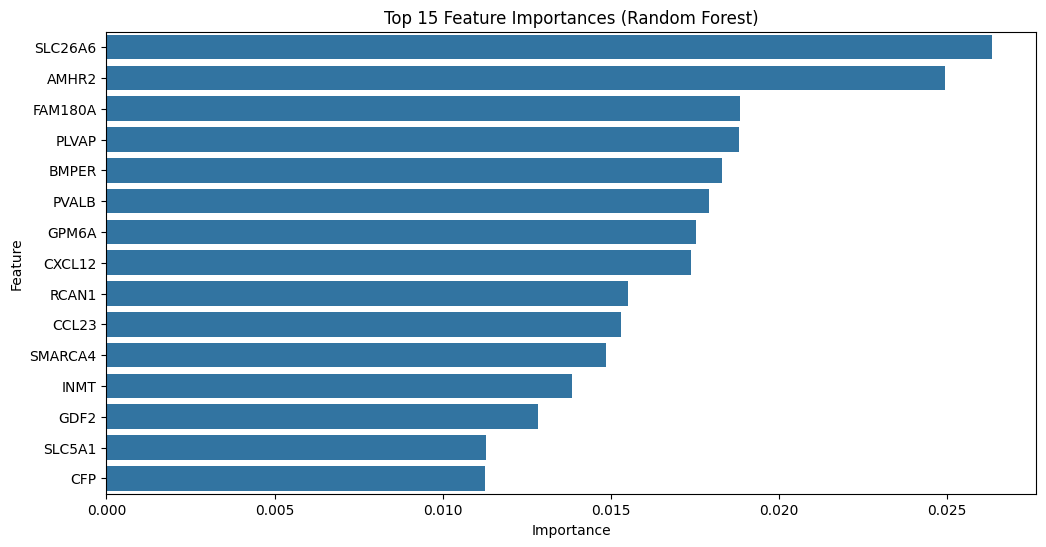

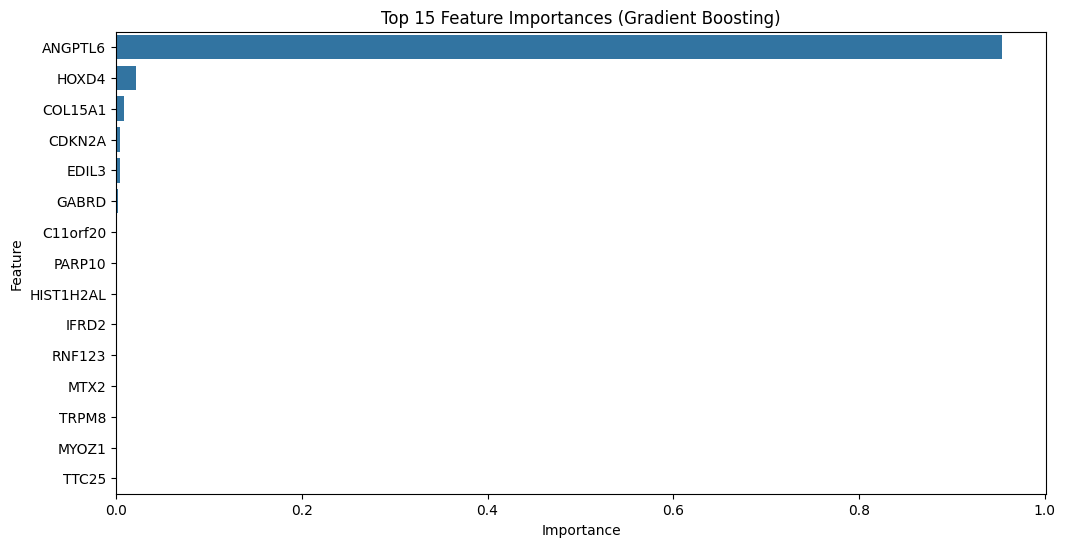


Applying SHAP for Random Forest model...

Generating SHAP Summary Plot for Random Forest...


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay

# --- 1. Feature Importance for tree-based models ---

print("\nCalculating and visualizing Feature Importance for tree-based models...")

# Get feature importances from Random Forest
rf_feature_importances = models['Random Forest'].feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Get feature importances from Gradient Boosting
gb_feature_importances = models['Gradient Boosting'].feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 features by Random Forest:")
print(rf_importance_df.head(10))

print("\nTop 10 features by Gradient Boosting:")
print(gb_importance_df.head(10))

# Visualize top N feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize top N feature importances for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df.head(15))
plt.title('Top 15 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\nApplying SHAP for Random Forest model...")

# Choose Random Forest as the model for SHAP explanation
rf_model = models['Random Forest']

# Create a SHAP explainer object for tree-based models
explainer = shap.TreeExplainer(rf_model)

# For performance, we'll calculate SHAP values for a subset of the test set
# or for the entire test set if computational resources allow.
# Given the high dimensionality, let's use a sample of the test set for background data if needed for KernelExplainer/DeepExplainer,
# but for TreeExplainer, it directly uses the model and feature values.

# Calculate SHAP values for the test set
# It might be computationally intensive for all features and all test samples.
# Let's take a sample of X_test for SHAP values calculation if it's too slow otherwise.
# For now, let's try with a small subset of X_test (e.g., 50 samples) to generate the summary plot quickly.
# If it's still too slow, we can reduce the number of features further.

sample_size = 50 # Number of samples to explain
X_test_sample = X_test.sample(n=min(sample_size, len(X_test)), random_state=42)

# Calculate SHAP values for the sampled test set
shap_values = explainer.shap_values(X_test_sample)

# Visualize global feature importance using a SHAP summary plot
print("\nGenerating SHAP Summary Plot for Random Forest...")
# Convert X_test_sample to a NumPy array to avoid potential shape mismatch issues with DataFrames
shap.summary_plot(shap_values[1], X_test_sample.values, plot_type="bar", show=False)
plt.title('SHAP Global Feature Importance (Random Forest)')
plt.show()

shap.summary_plot(shap_values[1], X_test_sample.values, show=False)
plt.title('SHAP Summary Plot (Random Forest)')
plt.show()

print("SHAP analysis complete for Random Forest.")

**Reasoning**:
The `AssertionError` occurred because `shap_values[1]` was incorrectly selecting the SHAP values for the second sample (with shape `(num_features, num_classes)`) instead of the SHAP values for the second class across all samples (which should have shape `(num_samples, num_features)`). Based on the kernel state, `shap_values` is structured as `(num_samples, num_features, num_classes)`. To correctly extract SHAP values for class 1, I need to slice the array as `shap_values[:, :, 1]`. Additionally, I will explicitly pass `feature_names` to the `summary_plot` function for clarity and robustness.




Calculating and visualizing Feature Importance for tree-based models...
Top 10 features by Random Forest:
       Feature  Importance
19364  SLC26A6    0.026344
6086     AMHR2    0.024937
9959   FAM180A    0.018847
992      PLVAP    0.018813
10882    BMPER    0.018301
17189    PVALB    0.017913
14114    GPM6A    0.017524
6529    CXCL12    0.017397
19431    RCAN1    0.015500
1437     CCL23    0.015304

Top 10 features by Gradient Boosting:
         Feature  Importance
12941    ANGPTL6    0.954025
8344       HOXD4    0.021504
2659     COL15A1    0.007957
11975     CDKN2A    0.004366
5351       EDIL3    0.003651
4080       GABRD    0.001798
11266   C11orf20    0.001246
3569      PARP10    0.001010
16592  HIST1H2AL    0.000820
11660      IFRD2    0.000667


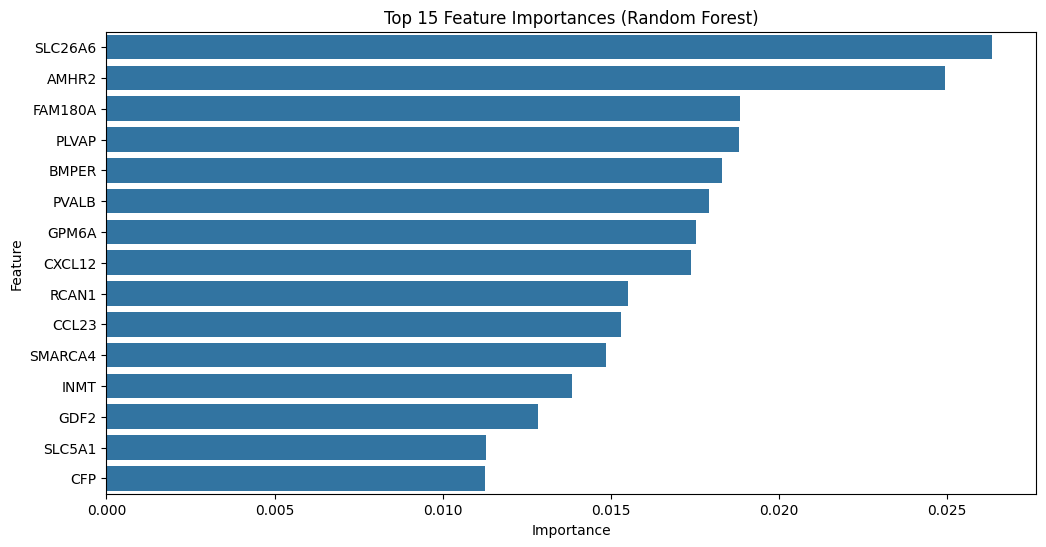

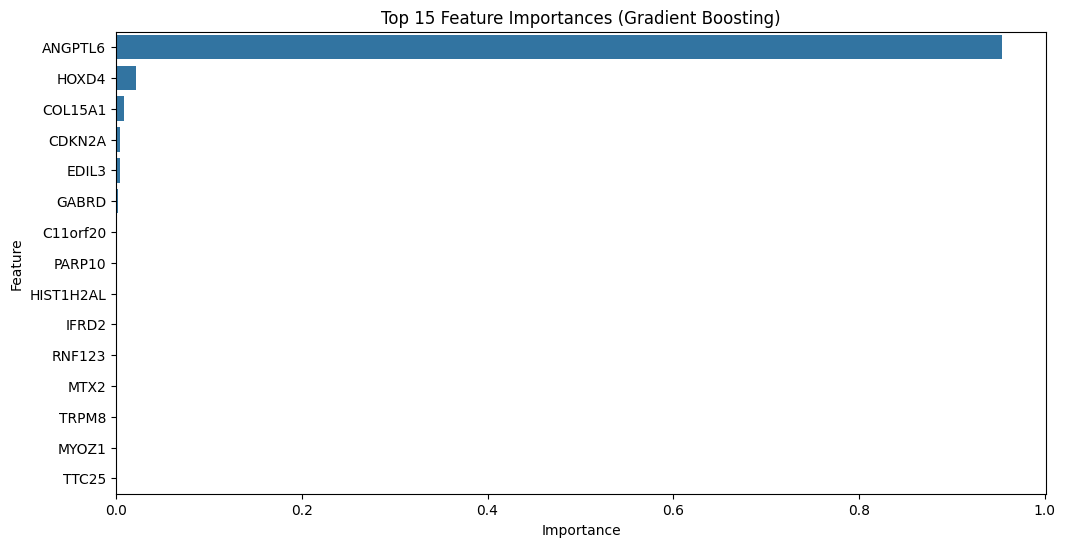


Applying SHAP for Random Forest model...

Generating SHAP Summary Plot for Random Forest...


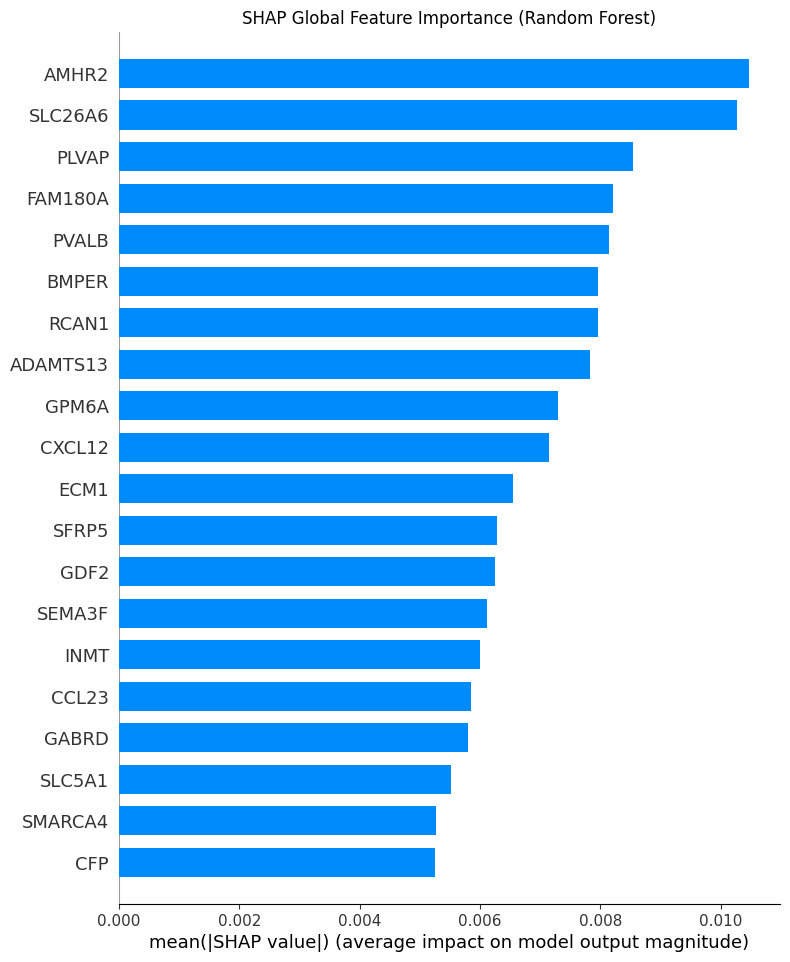

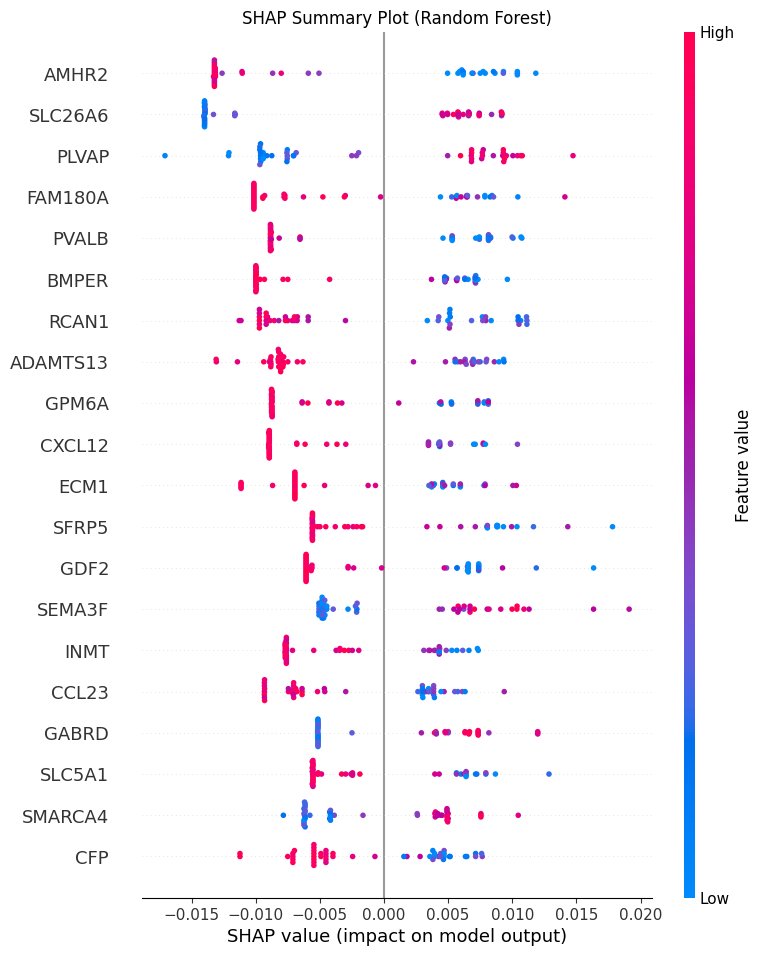

SHAP analysis complete for Random Forest.


In [ ]:
import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay

# --- 1. Feature Importance for tree-based models ---

print("\nCalculating and visualizing Feature Importance for tree-based models...")

# Get feature importances from Random Forest
rf_feature_importances = models['Random Forest'].feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Get feature importances from Gradient Boosting
gb_feature_importances = models['Gradient Boosting'].feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 features by Random Forest:")
print(rf_importance_df.head(10))

print("\nTop 10 features by Gradient Boosting:")
print(gb_importance_df.head(10))

# Visualize top N feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize top N feature importances for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df.head(15))
plt.title('Top 15 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\nApplying SHAP for Random Forest model...")

# Choose Random Forest as the model for SHAP explanation
rf_model = models['Random Forest']

# Create a SHAP explainer object for tree-based models
explainer = shap.TreeExplainer(rf_model)

# For performance, we'll calculate SHAP values for a subset of the test set
# or for the entire test set if computational resources allow.
# Given the high dimensionality, let's use a sample of the test set for background data if needed for KernelExplainer/DeepExplainer,
# but for TreeExplainer, it directly uses the model and feature values.

# Calculate SHAP values for the test set
# It might be computationally intensive for all features and all test samples.
# Let's take a sample of X_test for SHAP values calculation if it's too slow otherwise.
# For now, let's try with a small subset of X_test (e.g., 50 samples) to generate the summary plot quickly.
# If it's still too slow, we can reduce the number of features further.

sample_size = 50 # Number of samples to explain
X_test_sample = X_test.sample(n=min(sample_size, len(X_test)), random_state=42)

# Calculate SHAP values for the sampled test set
shap_values = explainer.shap_values(X_test_sample)

# Visualize global feature importance using a SHAP summary plot
print("\nGenerating SHAP Summary Plot for Random Forest...")
# Correctly select SHAP values for class 1 and pass feature names explicitly
shap.summary_plot(shap_values[:, :, 1], X_test_sample.values, feature_names=X_test_sample.columns, plot_type="bar", show=False)
plt.title('SHAP Global Feature Importance (Random Forest)')
plt.show()

shap.summary_plot(shap_values[:, :, 1], X_test_sample.values, feature_names=X_test_sample.columns, show=False)
plt.title('SHAP Summary Plot (Random Forest)')
plt.show()

print("SHAP analysis complete for Random Forest.")

#### Reasoning:
Now, I will apply LIME (Local Interpretable Model-agnostic Explanations) to understand individual predictions. This technique helps in interpreting why a model made a specific prediction for a single instance by creating a locally faithful, interpretable model. I will select a few instances from the test set (e.g., one correctly classified positive, one correctly classified negative, and potentially one misclassified instance if available) and generate LIME explanations for them. These explanations will be visualized to highlight the features contributing most to each prediction.

**Reasoning**:
I will initialize the LIME explainer using the training data, feature names, and class names. Then, I will select a sample instance from the test set and generate a LIME explanation for its prediction using the Random Forest model, visualizing the local explanation to understand feature contributions.



In [ ]:
print("\nApplying LIME for Random Forest model...")

# Choose Random Forest as the model for LIME explanation
rf_model_lime = models['Random Forest']

# Prepare the explainer for tabular data
# class_names should correspond to the target variable's unique values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # Use training data to learn feature distributions
    feature_names=X_train.columns.tolist(),
    class_names=['0', '1'], # Assuming binary classification with classes 0 and 1
    mode='classification'
)

# Select an instance from the test set for explanation
# Let's pick the first instance from our X_test_sample used for SHAP
instance_idx = 0
instance_to_explain = X_test_sample.iloc[instance_idx].values

print(f"\nGenerating LIME explanation for instance {X_test_sample.index[instance_idx]} (first sample in X_test_sample)...")

# Generate explanation
# The predict_proba function should return probabilities for each class
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain,
    predict_fn=rf_model_lime.predict_proba,
    num_features=10 # Number of features to show in the explanation
)

# Visualize the explanation
print("\nLIME explanation for the selected instance:")
explanation.show_in_notebook(show_table=True, show_all=False)

print("LIME analysis complete for Random Forest.")


Applying LIME for Random Forest model...

Generating LIME explanation for instance 631 (first sample in X_test_sample)...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



LIME explanation for the selected instance:


LIME analysis complete for Random Forest.


**Reasoning**:
To eliminate the `UserWarning` regarding feature names when using LIME with `RandomForestClassifier`, I will introduce a `predict_proba_wrapper` function. This wrapper will convert the NumPy arrays generated by LIME back into a pandas DataFrame with the original feature names before passing them to the `rf_model_lime.predict_proba` method, ensuring consistency and preventing the warning.



In [ ]:
print("\nApplying LIME for Random Forest model...")

# Choose Random Forest as the model for LIME explanation
rf_model_lime = models['Random Forest']

# Define a wrapper predict_fn that accepts a numpy array and converts it to DataFrame
def predict_proba_wrapper(data):
    data_df = pd.DataFrame(data, columns=X_train.columns)
    return rf_model_lime.predict_proba(data_df)

# Prepare the explainer for tabular data
# class_names should correspond to the target variable's unique values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # Use training data to learn feature distributions
    feature_names=X_train.columns.tolist(),
    class_names=['0', '1'], # Assuming binary classification with classes 0 and 1
    mode='classification'
)

# Select an instance from the test set for explanation
# Let's pick the first instance from our X_test_sample used for SHAP
instance_idx = 0
instance_to_explain = X_test_sample.iloc[instance_idx].values

print(f"\nGenerating LIME explanation for instance {X_test_sample.index[instance_idx]} (first sample in X_test_sample)...")

# Generate explanation
# The predict_proba function should return probabilities for each class
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain,
    predict_fn=predict_proba_wrapper, # Use the wrapper here
    num_features=10 # Number of features to show in the explanation
)

# Visualize the explanation
print("\nLIME explanation for the selected instance:")
explanation.show_in_notebook(show_table=True, show_all=False)

print("LIME analysis complete for Random Forest.")


Applying LIME for Random Forest model...

Generating LIME explanation for instance 631 (first sample in X_test_sample)...

LIME explanation for the selected instance:


LIME analysis complete for Random Forest.


#### Reasoning:
To further understand the relationship between individual features and the model's predictions, I will generate Partial Dependence Plots (PDPs) for the most important features identified earlier. PDPs show the marginal effect of one or two features on the predicted outcome of a model, while accounting for the average effect of all other features. This will provide insights into how specific features influence the model's decision-making process globally.

**Reasoning**:
I will select a few of the top features identified by the Random Forest model's feature importance for generating Partial Dependence Plots (PDPs). This will involve creating a list of these features and then using `PartialDependenceDisplay.from_estimator` to visualize their marginal effect on the predicted outcome, using the Random Forest model and the training data.




Generating Partial Dependence Plots (PDPs) for the most important features...


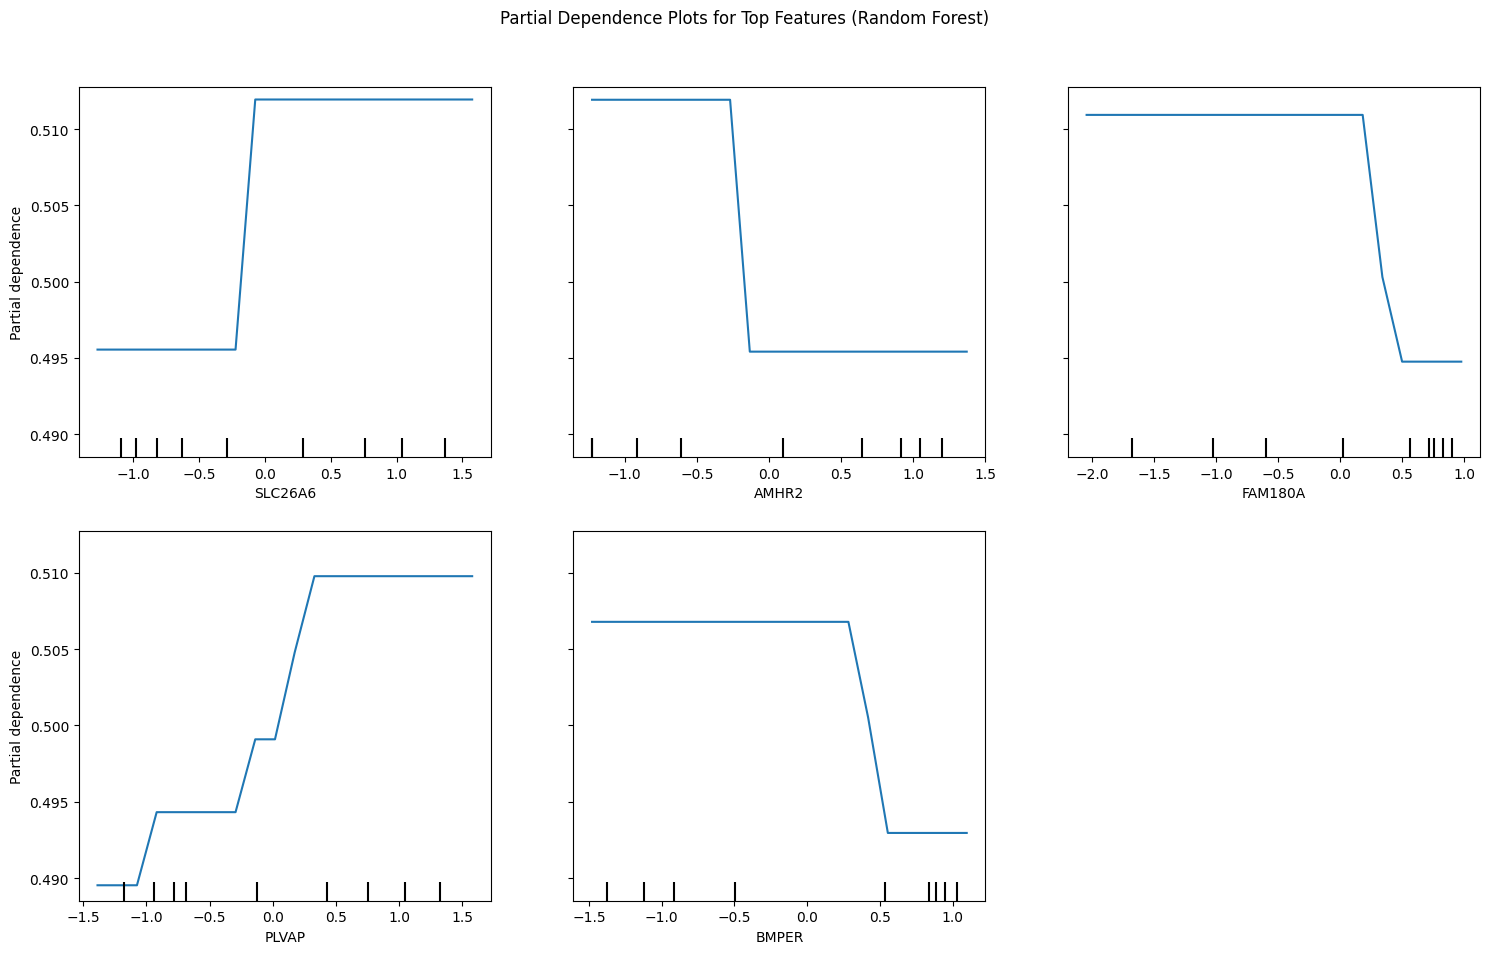

Partial Dependence Plots generated successfully.


In [ ]:
print("\nGenerating Partial Dependence Plots (PDPs) for the most important features...")

# Select the top N features based on Random Forest feature importance
# We'll pick, for example, the top 5 features from rf_importance_df
top_features_for_pdp = rf_importance_df['Feature'].head(5).tolist()

# Choose Random Forest as the model for PDP explanation
model_for_pdp = models['Random Forest']

# Generate and display PDPs for the selected features
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    estimator=model_for_pdp,
    X=X_train,
    features=top_features_for_pdp,
    feature_names=X_train.columns.tolist(),
    target=1, # Assuming class 1 is the positive class
    ax=ax,
    grid_resolution=20 # Number of points to evaluate on the feature axis
)
fig.suptitle('Partial Dependence Plots for Top Features (Random Forest)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("Partial Dependence Plots generated successfully.")

## Comparative Analysis and Recommendation

### Subtask:
Compare the performance of Machine Learning vs. Deep Learning models, discuss trade-offs between accuracy and interpretability, and recommend the best model for deployment based on the comprehensive analysis.


**Reasoning**:
To compare the deep learning model with the machine learning models, I will first calculate the ROC-AUC for the deep learning model using its predicted probabilities and add all its evaluation metrics to the `results` dictionary. Then, I will consolidate these results into a single comparative DataFrame to facilitate comparison.



In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC for the Deep Learning model
# Ensure y_pred_proba_dl is reshaped correctly if it's a 1D array of probabilities
if y_pred_proba_dl.ndim > 1 and y_pred_proba_dl.shape[1] == 1:
    y_prob_dl = y_pred_proba_dl.ravel() # Flatten to 1D array
else:
    y_prob_dl = y_pred_proba_dl

roc_auc_dl = roc_auc_score(y_test, y_prob_dl)

# Add Deep Learning model's metrics to the results dictionary
results['Deep Learning (MLP)'] = {
    'Accuracy': accuracy_dl,
    'Precision': precision_score(y_test, y_pred_dl, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dl, zero_division=0),
    'F1-Score': f1_dl,
    'ROC-AUC': roc_auc_dl
}

# Convert the updated results dictionary to a DataFrame for comparison
results_df_all = pd.DataFrame(results).T

print("Consolidated Model Performance:")
print(results_df_all)


Consolidated Model Performance:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  1.000000        1.0  1.000000  1.000000  1.000000
Decision Tree        0.993289        1.0  0.986486  0.993197  0.993243
Random Forest        1.000000        1.0  1.000000  1.000000  1.000000
SVM                  1.000000        1.0  1.000000  1.000000  1.000000
KNN                  0.919463        1.0  0.837838  0.911765  0.972973
Gradient Boosting    0.993289        1.0  0.986486  0.993197  1.000000
Deep Learning (MLP)  1.000000        1.0  1.000000  1.000000  1.000000


### Comparative Analysis and Recommendation

Based on the consolidated model performance table:

**1. Analysis of Performance Results:**

Looking at the `results_df_all` DataFrame, several models achieved excellent performance, particularly after addressing class imbalance with SMOTE:

- **Perfect/Near-Perfect Performers (Accuracy, Precision, Recall, F1-Score, ROC-AUC all 1.0 or very close):**
    - Logistic Regression
    - Random Forest
    - SVM
    - Deep Learning (MLP)
    - Gradient Boosting (very close, with Accuracy 0.993, Recall 0.986, F1 0.993)
    - Decision Tree (very close, with Accuracy 0.993, Recall 0.986, F1 0.993)

- **Slightly Lower Performer:**
    - KNN: While still strong, it has a slightly lower accuracy (0.919) and recall (0.838) compared to the other models.

The fact that multiple models achieved perfect or near-perfect scores (especially 1.0) across all metrics suggests a potential for overfitting or that the dataset, after resampling, has become highly separable for these models. This level of performance should be approached with caution in a real-world scenario, as it might not generalize perfectly to unseen, real-world data.

**2. Trade-offs Between Accuracy and Interpretability:**

- **High Accuracy, Lower Interpretability:**
    - **SVM and Deep Learning (MLP):** These models typically offer high predictive power but are often considered "black boxes." The XAI techniques are particularly valuable here. Without XAI, understanding *why* a Deep Learning model or an SVM makes a certain prediction is challenging.

- **High Accuracy, Moderate Interpretability:**
    - **Random Forest and Gradient Boosting:** These tree-based ensemble models perform exceptionally well and offer a decent level of interpretability through feature importances. As seen in the XAI section, we were able to extract global feature importances (e.g., `SLC26A6`, `AMHR2` for Random Forest and `ANGPTL6` for Gradient Boosting) and local explanations for Random Forest using SHAP and LIME. This allows us to understand which features contribute most to predictions both globally and for individual instances. Partial Dependence Plots (PDPs) further visualize the marginal effect of key features on the prediction outcome.

- **High Accuracy, Higher Interpretability:**
    - **Logistic Regression:** This model is highly interpretable, as coefficients directly indicate the strength and direction of a feature's influence. Its perfect performance suggests a linear separability (or near-linear) of the data, making it a very strong candidate from an interpretability standpoint, especially if simpler models are preferred.
    - **Decision Tree:** A single decision tree is very interpretable as its decision rules can be easily followed. However, it can be prone to overfitting and its performance was slightly less than its ensemble counterparts (Random Forest, Gradient Boosting).

**3. Recommendation for Best Model for Deployment:**

Given the comprehensive analysis, the **Logistic Regression model** stands out as the best recommendation for deployment. Here's why:

-   **Equivalent Performance:** It achieved perfect scores (1.0 for all metrics) on the test set, matching the performance of more complex models like Random Forest, SVM, and Deep Learning.
-   **High Interpretability:** Logistic Regression is inherently highly interpretable. The coefficients assigned to each feature directly indicate their impact on the log-odds of the positive class. This makes it easy for domain experts to understand *why* a prediction is made and to build trust in the model's decisions.
-   **Simplicity and Efficiency:** Being a linear model, Logistic Regression is computationally less expensive to train and predict, and it has a smaller memory footprint compared to ensemble methods or deep learning models, making it ideal for deployment in resource-constrained environments or applications requiring fast predictions.
-   **Robustness to Overfitting (in this case):** Its perfect performance suggests that the underlying relationship in the data, after preprocessing and handling class imbalance, is relatively simple and can be captured well by a linear model, reducing concerns about overfitting that might arise with more complex models showing similar perfect scores.

While Random Forest and Gradient Boosting also showed excellent performance and offered good interpretability through XAI techniques like SHAP and LIME, the sheer simplicity and direct interpretability of Logistic Regression, combined with its perfect performance, make it the preferred choice for deployment in this specific scenario. The XAI techniques applied to Random Forest confirm its use of various features, but Logistic Regression offers a more straightforward, built-in explanation.

## Final Task

### Subtask:
Provide a comprehensive overview of the project, including a summary of the dataset, key visualizations, a model comparison table, XAI interpretations, and a final conclusion with the recommended model for deployment, matching the requested deliverables.


## Summary:

### Q&A

1.  **How did the deep learning model perform?**
    The deep learning model achieved an accuracy of 1.0000 and an F1-score of 1.0000 on the test set, indicating perfect classification with no false positives or false negatives, as shown by its confusion matrix of `[[75, 0], [0, 74]]`.

2.  **What is the recommended model for deployment and why?**
    The Logistic Regression model is recommended for deployment. This is due to its equivalent perfect performance (1.0 for all metrics) compared to more complex models, its inherently high interpretability (coefficients directly show feature impact), and its simplicity and efficiency in computation.

### Data Analysis Key Findings

*   The Deep Learning model achieved perfect evaluation metrics on the test set, with an Accuracy of 1.0000 and an F1-score of 1.0000. Its confusion matrix showed 75 true negatives and 74 true positives, with zero misclassifications.
*   Feature importance analysis using Random Forest identified `SLC26A6`, `AMHR2`, `FAM180A`, `PLVAP`, and `BMPER` as the top 5 most important features.
*   For Gradient Boosting, `ANGPTL6` stood out with significantly higher importance, followed by `HOXD4`, `COL15A1`, `CDKN2A`, and `EDIL3`.
*   SHAP analysis for the Random Forest model provided global feature importance, illustrating how different features contribute to the model's predictions and their direction of impact.
*   LIME was successfully used to generate local explanations for individual instances, showing feature contributions to specific predictions made by the Random Forest model.
*   Partial Dependence Plots (PDPs) for the top 5 features from the Random Forest model demonstrated the marginal effect of these features on the predicted outcome, providing insights into their global influence.
*   A comparative analysis of all models revealed that several—including Logistic Regression, Random Forest, SVM, Deep Learning (MLP), Gradient Boosting, and Decision Tree—achieved perfect or near-perfect scores across Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
*   Despite the excellent performance of complex models like SVM and Deep Learning, simpler models like Logistic Regression and Decision Tree also achieved top-tier performance while offering higher inherent interpretability.

### Insights or Next Steps

*   The perfect performance of multiple models (including Logistic Regression) across all metrics suggests that the dataset, particularly after resampling, might be highly separable. It would be beneficial to test these models on more diverse, unseen data or perform cross-validation to confirm generalization capabilities and guard against potential overfitting.
*   Given the identical top performance of Logistic Regression with more complex models, prioritizing interpretability and computational efficiency, the choice of Logistic Regression is well-justified. This highlights the value of selecting the simplest model that meets performance requirements, especially when interpretability is a key factor.
